In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limitar a 1 hilo

from sklearn.cluster import KMeans
# Resto de tu código aquí


# Asumimos que iris_df está definido y contiene la columna 'Species'


url = 'https://huggingface.co/linearch/None_eval_5_no_mlu_e10_iris/raw/0461761606bbf44f8b9a81138f7544fa6a838e38/iris/tab_ddpm/2_0/25/synth.csv'

# Leer el CSV directamente desde la URL
iris_df = pd.read_csv(url)
iris_df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.092964,3.751497,1.581358,0.190442,Iris-setosa
1,1,6.130622,2.125015,4.345925,1.263568,Iris-versicolor
2,2,4.562010,3.601577,1.000000,0.196646,Iris-setosa
3,3,7.733763,2.588887,6.900000,2.310019,Iris-virginica
4,4,6.513559,3.020067,5.607694,2.220288,Iris-virginica
...,...,...,...,...,...,...
115,115,6.757442,2.779000,4.781852,1.466097,Iris-versicolor
116,116,7.900000,3.765955,6.382487,1.961684,Iris-virginica
117,117,5.593039,2.526776,4.134565,1.246772,Iris-versicolor
118,118,5.602768,3.000000,4.450112,1.443034,Iris-versicolor


C:\Users\pcstu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pcstu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pcstu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pcstu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

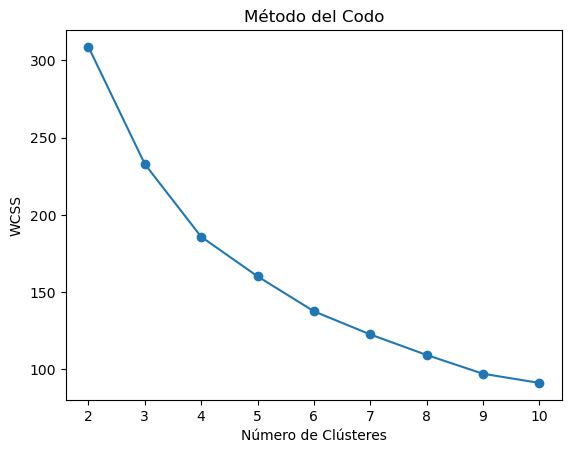

In [5]:
iris_df
X=iris_df[['species']]
X = iris_df.drop(columns='species') 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# WCSS (Within-Cluster Sum of Squares) para determinar el número óptimo de clústeres
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Elbow Method para determinar el número óptimo de clústeres
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')


C:\Users\pcstu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


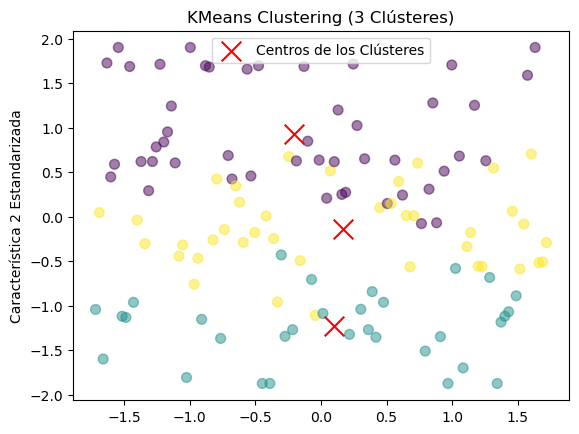

In [10]:
# Aplicamos KMeans con el número de clústeres seleccionado (3)
print(iris_df.columns)




kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) 
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clústeres
cluster_labels = kmeans.labels_

# Visualizamos los clústeres en 2D (utilizando las dos primeras características)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centros de los Clústeres')
plt.ylabel('Característica 1 Estandarizada')
plt.ylabel('Característica 2 Estandarizada')
plt.title('KMeans Clustering (3 Clústeres)')
plt.legend()
plt.show()

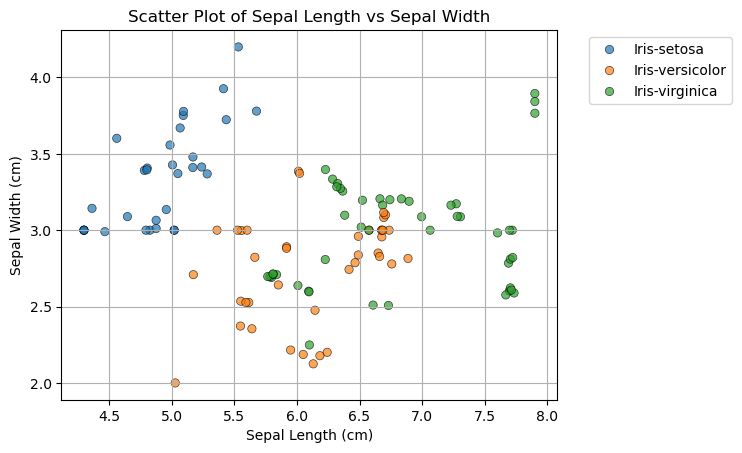

In [12]:

# Selección de la variable para el gráfico
x_variable = 'sepal_length'  # Ajustado al nombre correcto de la columna
y_variable = 'sepal_width'   # Ajustado al nombre correcto de la columna
hue_variable = 'species'

# Crear el gráfico de dispersión con seaborn
sns.scatterplot(data=iris_df, x=x_variable, y=y_variable, hue=hue_variable,
    sizes=(20, 200), alpha=0.7, edgecolor='k', linewidth=0.5, marker='o')

# Configuración del gráfico
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')  # Corregido

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')  # Corregido
plt.grid(True)
plt.show()

In [14]:
list(zip(cluster_labels, iris_df['species'].values))

[(1, 'Iris-setosa'),
 (2, 'Iris-versicolor'),
 (1, 'Iris-setosa'),
 (0, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (0, 'Iris-versicolor'),
 (0, 'Iris-virginica'),
 (1, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (0, 'Iris-virginica'),
 (1, 'Iris-setosa'),
 (2, 'Iris-versicolor'),
 (0, 'Iris-versicolor'),
 (2, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (0, 'Iris-versicolor'),
 (0, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (0, 'Iris-versicolor'),
 (0, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (2, 'Iris-versicolor'),
 (2, 'Iris-virginica'),
 (1, 'Iris-setosa'),
 (0, 'Iris-virginica'),
 (2, 'Iris-versicolor'),
 (2, 'Iris-versicolor'),
 (1, 'Iris-setosa'),
 (0, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (2, 'Iris-virginica'),
 (2, 'Iris-versicolor'),
 (1, 'Iris-setosa'),
 (2, 'Iris-versicolor'),
 (0, 'Iris-virginica'),
 (0, 'Iris-versicolor'),
 (2, 'Iris-versicolor'),
 (2, 'Iris-versicolor'),
 (2, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (0, 'Iris-virginica'),
 (